In [1]:
# Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import pdb (for debugging process)


# Visualizer Size
plt.rcParams['figure.figsize'] = [15, 7]

In [2]:
# Handeling Data

# Importing Data (Excel)
dataset = pd.read_csv() # path for dataset
indepX = dataset.iloc[:,[0]].values
depY = dataset.iloc[:,[1]].values
    
# Scaling
from sklearn.preprocessing import StandardScaler
scale =  StandardScaler()
indepX = scale.fit_transform(indepX)
depY = scale.fit_transform(depY)

# Splitting Data
from sklearn.model_selection import train_test_split
indepX_train, indepX_test, depY_train, depY_test = train_test_split(indepX, depY, 
                                                                    test_size = 0.3, 
                                                                    random_state = 42)

C:\Users\Alee\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [3]:
# Hypothesis Function

def hyp(theta, x):
    return theta[0] + theta[1] * x

In [4]:
# Error/Cost Function

def errorFunc(theta, indepX, depY):
    
    # Initialization
    m = len(indepX)
    error = 0
    for i in range(m):
        
        x = indepX[i]
        y = depY[i]
        error += (y - (theta[1] * x + theta[0])) ** 2
        
    return error / (2*m)

In [5]:
# Gradient / Del Function

def grad(indepX, depY, curr_theta, learning_rate):
#     pdb.set_trace()  for debugging process 
    # Initialization
    grad = np.zeros(2)
    new_theta = curr_theta
    m = len(indepX)
    
    # Adjustments
    for i in range(m):
        
        x = indepX[i]
        y = depY[i]
        
        grad[0] += (-1/m) * (y - (curr_theta[0] + (curr_theta[1] * x)))
        grad[1] += (-1/m) * x * (y - (curr_theta[0] + (curr_theta[1] * x)))
    
    temp0 = curr_theta[0] - (learning_rate * grad[0])
    temp1 = curr_theta[1] - (learning_rate * grad[1])
    
    new_theta[0] = temp0
    new_theta[1] = temp1
    
    return new_theta

In [6]:
# Gradient Descent Function

def gradientDescent(indepX,depY, init_theta, learning_rate, num_iterations):
    
    # Initialization
    theta = init_theta
    J = [0 for i in range(num_iterations)]

    # Iterating the Process
    for i in range(num_iterations):
        
        theta = grad(indepX, depY, theta, learning_rate)
        J[i] = errorFunc(theta, indepX, depY)
        
    return theta, J

In [7]:
# Main Function

def main():
    
    # Initialization
    init_theta = np.zeros(2)
    learning_rate = 0.05
    num_iterations = 100
    H = [0 for i in range(len(indepX_train))]
    J = [0 for i in range(num_iterations)]
    
    # Calling Functions
    theta, J = gradientDescent(indepX_train, depY_train, init_theta, learning_rate, num_iterations)
    H = hyp(theta, indepX_train)
    
    # Check
    for i in range(len(depY_test)):
        print(float(H[i]))
        print(depY_test[i])
        print('----------')

    # Visualization
    
    # Visualize J
    plt.plot(J, color = 'green')
    plt.title('Error vs No.Itrerations')
    plt.xlabel('Itrerations')
    plt.ylabel('Cost Function')
    plt.show()
    
    # Visualize H
    plt.scatter(indepX_train, depY_train, color = 'red')
    plt.plot(indepX_train, H, color = 'blue')
    plt.title('Size vs Price (Training set)')
    plt.xlabel('Size')
    plt.ylabel('Price')
    plt.show()
    
        

1.21980407600429
[ 0.77453586]
----------
-1.2262905724627455
[-0.96309143]
----------
-1.3676779850866427
[-0.48886723]
----------
-1.4129589211557343
[-1.27759702]
----------
0.6616472313975318
[ 0.5509942]
----------
1.183764147296238
[-1.32012595]
----------
0.5128670128848032
[-0.34729904]
----------
-0.06931645086065677
[-0.34675673]
----------
-0.600674374120402
[-0.50656855]
----------
-0.4140060254274132
[ 0.36825286]
----------
1.5136681100853318
[ 0.80132933]
----------
-1.2521653930736547
[ 1.57113761]
----------
-0.21994487084559322
[-0.83983466]
----------
-0.5766477549817005
[ 1.17251473]
----------
1.2290450833653292
[ 1.73004275]
----------


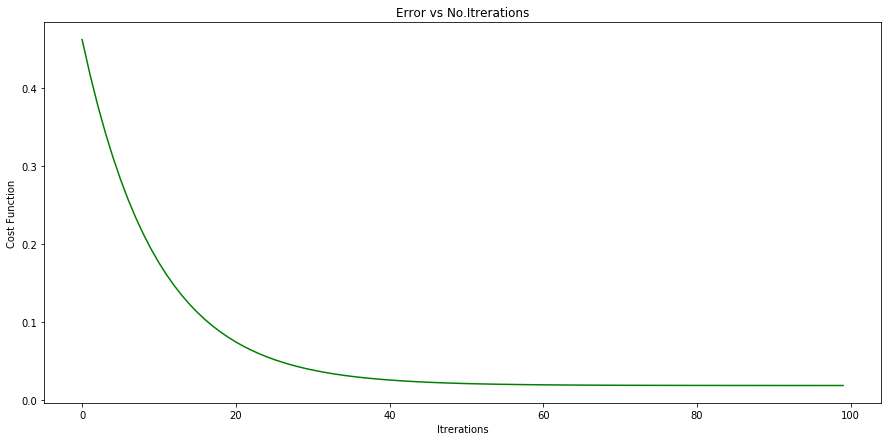

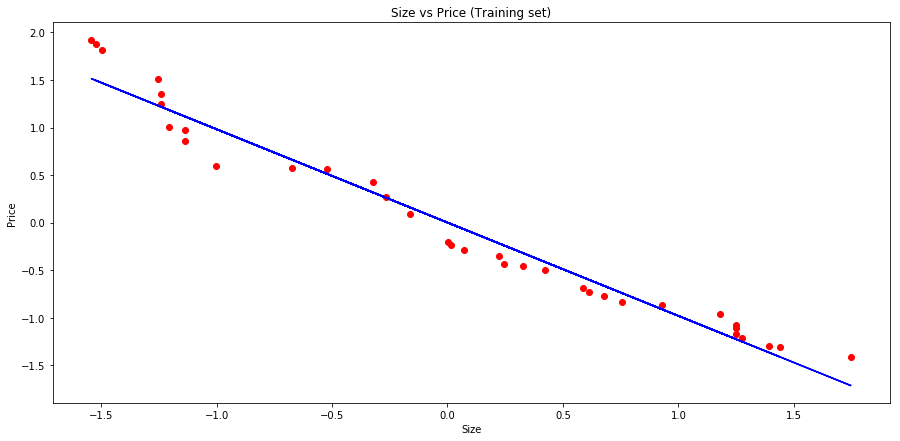

In [8]:
if __name__ == '__main__':
    main()